# Importing libraries

### These stereos download in certain packages and libraries for data analysis, for developing an application of machine learning, and for natural language processing. Some of additional packages are NumPy, Pandas, Matplotlib & Seaborn for data handling and visualization of data, TensorFlow & Keras for constructing a Neural Networks and NLTK for lemmatization & removal of stopwords. It also imports functions for constructing the train and test datasets; for assessing the accuracy of the model; and the tokenization. These warnings are turned of to facilitate going through a process without being interfered with.

In [ ]:
import numpy as nmpy#The library named numpy is imported by using alias nmpy
import pandas as pnds#The library named pandas is imported by using alias pnds
import matplotlib.pyplot as mt_plot#The library named matplotlib.pyplot is imported by using alias mt_plot
import seaborn as sbrn  # The library named seaborn is imported by using alias sbrn
from wordcloud import WordCloud  # The library named wordcloud is imported
import nltk  # The Natural Language Toolkit (nltk) is imported
nltk.download('stopwords')  # The stopwords corpus is downloaded
nltk.download('punkt')  # The punkt tokenizer is downloaded
nltk.download('wordnet')  # The WordNet corpus is downloaded
from nltk.stem import WordNetLemmatizer  # The WordNetLemmatizer class from nltk.stem is imported
from nltk.corpus import stopwords  # The stopwords corpus from nltk.corpus is imported
from nltk.stem.porter import PorterStemmer  # The Porter Stemmer is imported from nltk.stem.porter
import re  # The regular expression library is imported
import tensorflow as tf  # The TensorFlow library is imported
from keras.models import Model  # The Model class from keras.models is imported
from keras.layers import Input, Embedding, LSTM, Dense, Flatten, Reshape  # Specific layers from keras.layers are imported
from keras.optimizers import Adam  # The Adam optimizer is imported from keras.optimizers
from keras.metrics import Precision, Recall  # Precision and Recall metrics from keras.metrics are imported
from sklearn.model_selection import train_test_split  # The train_test_split function from sklearn.model_selection is imported
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
from tensorflow.keras.preprocessing.text import Tokenizer  # The Tokenizer class from tensorflow.keras.preprocessing.text is imported
from tensorflow.keras.preprocessing.sequence import pad_sequences  # The pad_sequences function from tensorflow.keras.preprocessing.sequence is imported

import warnings  # The warnings module is imported
warnings.filterwarnings('ignore')  # All warnings are ignored

In [ ]:
# Unzip data in drive in the same location
!unzip '/content/drive/MyDrive/Colab Notebooks/Anjaneyam NLP Code /archive (14).zip' -d '/content/drive/MyDrive/Colab Notebooks/Anjaneyam NLP Code /'

In [ ]:
imdb_data = pnds.read_csv('/content/drive/MyDrive/Colab Notebooks/Anjaneyam NLP Code /IMDB Dataset.csv')

In [ ]:
imdb_data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
imdb_data.shape

(50000, 2)

In [ ]:
imdb_data.sentiment.value_counts()

NameError: name 'imdb_data' is not defined

In [ ]:
imdb_data.isnull().sum()

,0
review,0
sentiment,0


In [ ]:
imdb_data.duplicated().sum()

418

In [ ]:
imdb_data.drop_duplicates(inplace=True)

In [ ]:
imdb_data.duplicated().sum()

0

In [ ]:
imdb_data.sentiment.value_counts()

,count
sentiment,
positive,24884
negative,24698


In [ ]:
imdb_data['sentiment'] = imdb_data['sentiment'].replace({'psitiv': 1, 'negative': 0})


In [ ]:
imdb_data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


# Preprocessing

This code defines a function clean_review to preprocess movie reviews by removing unwanted elements. It eliminates HTML tags, URLs, and non-alphabetic characters from the text, converts it to lowercase, and splits it into individual words before joining them back into a cleaned string. The function is then applied to a dataset imdb_data containing movie reviews, creating a new column called Processed_review that holds the cleaned version of each review. The head() function displays the first few rows of the modified dataset.

In [ ]:
stop_words = set(stopwords.words('english'))

def clean_review(Procesd_Colmn):
  Procesd_Colmn = re.sub('<.*?>', '', Procesd_Colmn)  # Remove HTML tags
  Procesd_Colmn = re.sub(r'http\S+', '', Procesd_Colmn)  # Remove URLs
  Procesd_Colmn = re.sub('[^a-zA-Z]', ' ', Procesd_Colmn) # Remove non-alphabetic characters
  Procesd_Colmn = Procesd_Colmn.lower()
  Procesd_Colmn = Procesd_Colmn.split()
  Procesd_Colmn = ' '.join(Procesd_Colmn)
  return Procesd_Colmn


imdb_data['Processed_review'] = imdb_data['review'].apply(clean_review)

imdb_data.head()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,review,sentiment,Processed_review
0,One of the other reviewers has mentioned that ...,1,one of the other reviewers has mentioned that ...
1,A wonderful little production. <br /><br />The...,1,a wonderful little production the filming tech...
2,I thought this was a wonderful way to spend ti...,1,i thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...,0,basically there s a family where a little boy ...
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,petter mattei s love in the time of money is a...


In [ ]:
lemmatizer = WordNetLemmatizer()

def lemmatize_review(Procesd_Colmn):
  Procesd_Colmn = Procesd_Colmn.split()
  Procesd_Colmn = [lemmatizer.lemmatize(word) for word in Procesd_Colmn]
  Procesd_Colmn = ' '.join(Procesd_Colmn)
  return Procesd_Colmn

imdb_data['Lemmatized_review'] = imdb_data['Processed_review'].apply(lemmatize_review)

imdb_data.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,review,sentiment,Processed_review,Lemmatized_review
0,One of the other reviewers has mentioned that ...,1,one of the other reviewers has mentioned that ...,one of the other reviewer ha mentioned that af...
1,A wonderful little production. <br /><br />The...,1,a wonderful little production the filming tech...,a wonderful little production the filming tech...
2,I thought this was a wonderful way to spend ti...,1,i thought this was a wonderful way to spend ti...,i thought this wa a wonderful way to spend tim...
3,Basically there's a family where a little boy ...,0,basically there s a family where a little boy ...,basically there s a family where a little boy ...
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,petter mattei s love in the time of money is a...,petter mattei s love in the time of money is a...


### This code creates and displays word clouds for psitiv and negative IMDB reviews. psitiv reviews are shown with warm-colored words on a light blue background, while negative reviews have cool-colored words on a black background. The reviews are first concatenated, and then word clouds are generated using WordCloud, styled, and visualized using matplotlib to highlight frequently used words in each sentiment category.

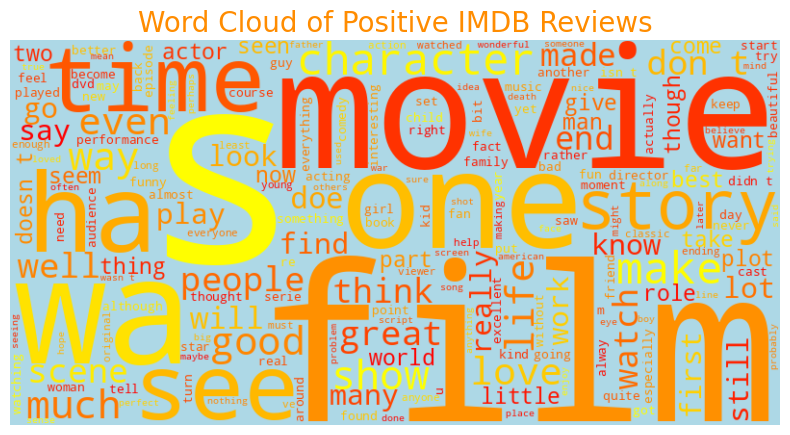

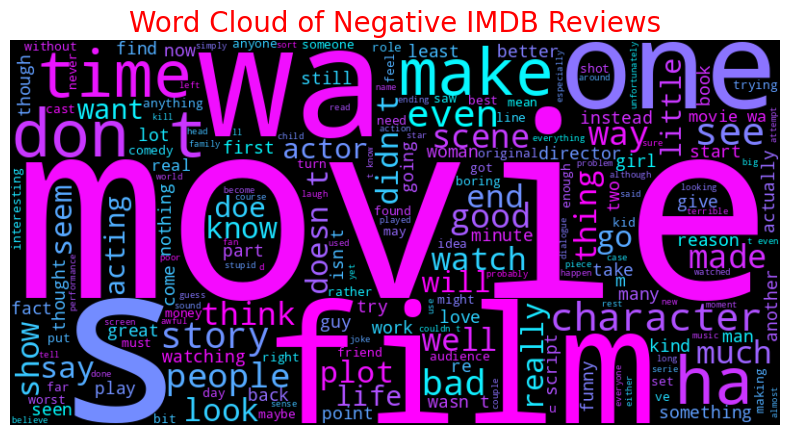

In [ ]:
# Assuming 'sentiment' column contains 1 for psitiv and 0 for negative
psitiv_reviews = imdb_data[imdb_data['sentiment'] == 1]['Lemmatized_review']
negative_reviews = imdb_data[imdb_data['sentiment'] == 0]['Lemmatized_review']

# Concatenate psitiv and negative reviews into separate strings
all_psitiv_reviews = " ".join(psitiv_reviews)
all_negative_reviews = " ".join(negative_reviews)

# Customize word cloud appearance for psitiv and negative reviews
# psitiv: Light blue background, warm colored words
wordcloud_psitiv = WordCloud(width=800, height=400,
                               background_color='lightblue',
                               colormap='autumn',  # Warm colors
                               contour_color='darkorange',
                               contour_width=2).generate(all_psitiv_reviews)

# Negative: Dark background, cool colored words
wordcloud_negative = WordCloud(width=800, height=400,
                               background_color='black',
                               colormap='cool',  # Cool colors
                               contour_color='red',
                               contour_width=2).generate(all_negative_reviews)

# Display the word clouds with custom styles
mt_plot.figure(figsize=(10, 5))  # Adjusting the figure size as needed for good visualization
mt_plot.imshow(wordcloud_psitiv, interpolation='bilinear')  # Display the psitiv word cloud
mt_plot.axis("off")  # Turnd off the axis
mt_plot.title('Word Cloud of psitiv IMDB Reviews', fontsize=20, color='darkorange')  # Assigning Title and color for psitiv reviews
mt_plot.show()  # Display the plot thats created by positive words

mt_plot.figure(figsize=(10, 5))  # Adjusting the figure size as needed for good visualization
mt_plot.imshow(wordcloud_negative, interpolation='bilinear')  # Display the negative word cloud
mt_plot.axis("off")  # Turn off the axis
mt_plot.title('Word Cloud of Negative IMDB Reviews', fontsize=20, color='red')  # Assigning Title and color for negative reviews
mt_plot.show()  # Display the plot thats created by negative words
